## Observations and Insights 

In [1]:
#activate matplotlib plotting
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = 'data\mouse_metadata.csv'
study_results_path = 'data\study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_mouse_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
study_mouse_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(study_mouse_merge["Mouse ID"])
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_measure_df = study_mouse_merge.loc[:, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen", "Sex"]]
#mouse_measure_df
mouse_clean_df = mouse_measure_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex
0,k403,0,45.000000,Ramicane,Male
1,k403,5,38.825898,Ramicane,Male
2,k403,10,35.014271,Ramicane,Male
3,k403,15,34.223992,Ramicane,Male
4,k403,20,32.997729,Ramicane,Male
...,...,...,...,...,...
1888,z969,25,63.145652,Naftisol,Male
1889,z969,30,65.841013,Naftisol,Male
1890,z969,35,69.176246,Naftisol,Male
1891,z969,40,70.314904,Naftisol,Male


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_rows = study_mouse_merge[study_mouse_merge.duplicated(['Mouse ID',])]
all_dup_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_mouse_merge.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = len(mouse_clean_df["Mouse ID"].unique())
mouse_clean_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mouse_group = mouse_clean_df.groupby(["Drug Regimen"])
#mean = mouse_group["Tumor Volume (mm3)"].mean()
#median = mouse_group["Tumor Volume (mm3)"].median()
#variance = mouse_group["Tumor Volume (mm3)"].var()
#stdev = mouse_group["Tumor Volume (mm3)"].std()
#sem = mouse_group["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = mouse_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = study_mouse_merge.describe()
summary_stats

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_one_df = pd.DataFrame(mouse_clean_df.groupby(["Drug Regimen"]).count()).reset_index()

# Filter the DataFrame to columns in chart
bar_data = bar_one_df[["Drug Regimen", "Mouse ID"]]

# Set the index to be "Drug Regimen" 
bar_data = bar_data.set_index("Drug Regimen")


<IPython.core.display.Javascript object>


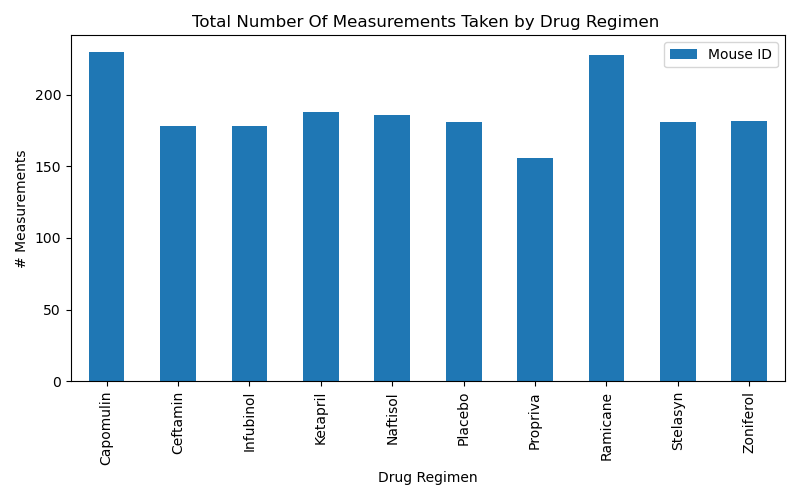

In [10]:
#create chart
bar_data.plot(kind="bar", figsize=(8,5))
plt.title("Total Number Of Measurements Taken by Drug Regimen ")
plt.ylabel("# Measurements")
plt.show()
plt.tight_layout()


In [11]:
plt.clf()
plt.cla()
plt.close()

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_two = summary_df.index.tolist()
bar_two

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [13]:
# Convert regimen count into a list
bar_count = (study_mouse_merge.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
bar_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [14]:
x_axis = np.arange(len(bar_count))

In [15]:
# Define x-axis
x_axis = bar_two

# Create a bar chart 
plt.figure(figsize=(10,4))
plt.bar(x_axis, bar_count, color='b', alpha=0.5, align="center")

<IPython.core.display.Javascript object>

<BarContainer object of 10 artists>

In [16]:
# Create the ticks for our bar chart's x axis
#this is wrong
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ?)

In [17]:
# Give the chart a title, x label, and y label
plt.title("Total Number Of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

Text(83.09722222222221, 0.5, 'Count')

In [18]:
plt.clf()
plt.cla()
plt.close()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(study_mouse_merge.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [20]:
# Filter the DataFrame
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


<IPython.core.display.Javascript object>


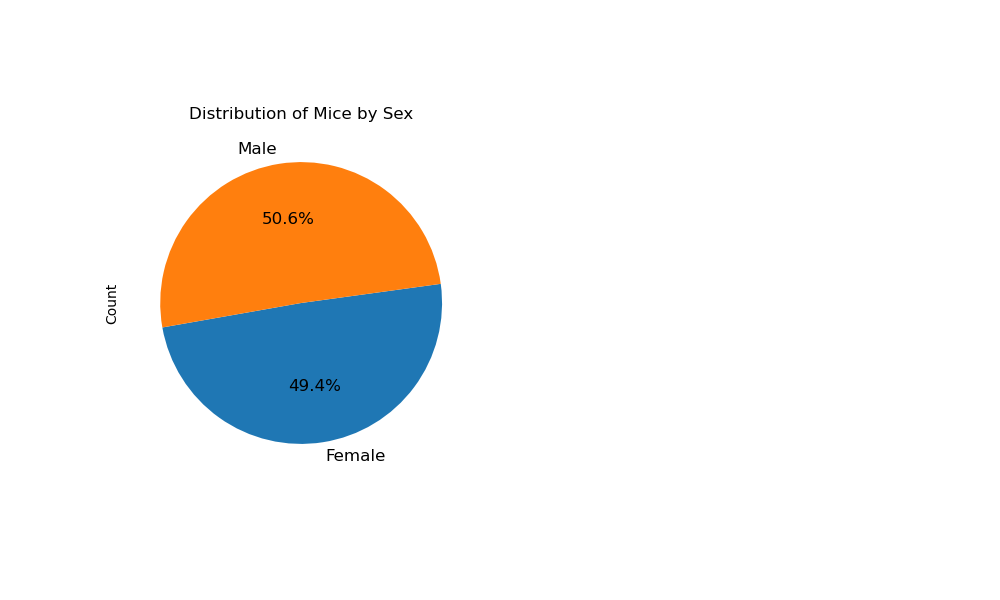

<AxesSubplot:title={'center':'Distribution of Mice by Sex'}, ylabel='Count'>

In [21]:
# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', title='Distribution of Mice by Sex', y='Count', ax=ax1, autopct='%1.1f%%', 
 startangle=190, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=12)

In [22]:
plt.clf()
plt.cla()
plt.close()

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (study_mouse_merge.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count


[935, 958]

In [24]:
# create pie chart
labels = ["Females", "Males"]
colors = ["orange", "blue"]
#set explode
explode = (0.1, 0)

In [25]:
# create pie chart details
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x1dac70c4100>,
 [Text(-0.9338063422995886, -0.7536615388097392, 'Females'),
  Text(0.8559891471079559, 0.6908564105755944, 'Males')],
 [Text(-0.5447203663414266, -0.43963589763901445, '49.4%'),
  Text(0.46690317114979407, 0.37683076940486965, '50.6%')])

In [26]:
# equal axis
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show(block=None)>

In [153]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_df.groupby("Mouse ID")
mouse_by_max_df = mouse_group.max()
great_timepoint = pd.DataFrame(mouse_by_max_df["Timepoint"])
great_timepoint.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(clean_df, great_timepoint, how='right', on=['Mouse ID', 'Timepoint'])
last_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.0,0
1,a251,Infubinol,Female,21,25,0,45.0,0
2,a262,Placebo,Female,17,29,0,45.0,0
3,a275,Ceftamin,Female,20,28,0,45.0,0
4,a366,Stelasyn,Female,16,29,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,0,45.0,0
245,z578,Ramicane,Male,11,16,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


In [155]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_df = study_mouse_merge.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [156]:
# Select data for Capomulin regimen and reset index
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [157]:
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [158]:
# get quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [159]:
# outlier plot of final total volume
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

<IPython.core.display.Javascript object>

In [160]:
plt.clf()
plt.cla()
plt.close()

In [161]:
# Select data for Ramicane regimen and reset index
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [162]:
# Convert column "Tumor Volume" of the Ramicane regimen into a dataframe object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [163]:
# get quartile calculations
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [164]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

<IPython.core.display.Javascript object>

In [165]:
plt.clf()
plt.cla()
plt.close()

In [166]:
# Select data for Infubinol regimen and reset index
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [167]:
# Convert column "Tumor Volume" of the Infubinol regimen into a dataframe object
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [168]:
# get quartile calculations
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [169]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

<IPython.core.display.Javascript object>

In [170]:
plt.clf()
plt.cla()
plt.close()

In [171]:
# Select data for Ceftamin regimen and reset index
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [172]:
# Convert column "Tumor Volume" of the Ceftamin regimen into a dataframe object
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [173]:
# get quartile calculations
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [174]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

<IPython.core.display.Javascript object>

In [175]:
plt.clf()
plt.cla()
plt.close()

In [176]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_box = study_mouse_merge.loc[study_mouse_merge["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_box.boxplot(["Tumor Volume (mm3)"],"Drug Regimen")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [177]:
plt.clf()
plt.cla()
plt.close()

## Line and Scatter Plots

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = study_mouse_merge.loc[study_mouse_merge["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [179]:
# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


In [180]:
# Select columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)

cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Timepoint'>

In [181]:
plt.clf()
plt.cla()
plt.close()

In [194]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [195]:
# Select columns
scat_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scat_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [196]:
# Calculate average tumor volume for each mouse
average_tumor_vol_cap = pd.DataFrame(scat_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_tumor_vol_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [197]:
# Set index
average_tumor_vol_cap = average_tumor_vol_cap.set_index('Mouse ID')

In [198]:
# Rename column
average_tumor_vol_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_tumor_vol_cap.head()

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


<IPython.core.display.Javascript object>


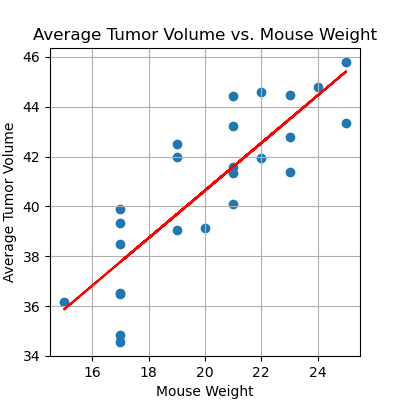

In [199]:
#Generate a scatter plot
average_tumor_vol_cap.plot(kind="scatter", x="Weight (g)", 
                y="Average Volume", grid=True, figsize=(4,4),
              title="Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [200]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_tumor_vol_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [201]:
from scipy.stats import linregress

In [202]:
# Add the linear regression equation and line to plot
x_values = average_tumor_vol_cap['Weight (g)']
y_values = average_tumor_vol_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()